In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20,5)  #defualt figure size


In [3]:
sell_prices = pd.read_csv('./data/sell_prices.csv')
calendar = pd.read_csv('./data/calendar.csv')
sales = pd.read_csv('./data/sales_train_validation.csv')
sample_output = pd.read_csv('./data/sample_submission.csv')

In [4]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [5]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


In [7]:
sample_output.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
sales.groupby('cat_id').count()  # 갯수

,id,item_id,dept_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
cat_id,,,,,,,,,,,,,,,,,,,,,
FOODS,14370,14370,14370,14370,14370,14370,14370,14370,14370,14370,...,14370,14370,14370,14370,14370,14370,14370,14370,14370,14370
HOBBIES,5650,5650,5650,5650,5650,5650,5650,5650,5650,5650,...,5650,5650,5650,5650,5650,5650,5650,5650,5650,5650
HOUSEHOLD,10470,10470,10470,10470,10470,10470,10470,10470,10470,10470,...,10470,10470,10470,10470,10470,10470,10470,10470,10470,10470


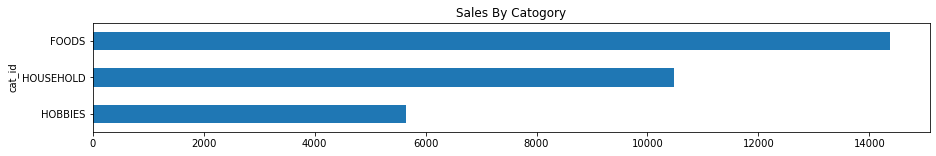

In [9]:
# sales 카테고리 , 카테고리 행의 수의 갯수의 그래프

sales.groupby('cat_id').count()['id'].sort_values().plot(kind='barh',figsize=(15,2), title='Sales By Catogory',width=0.5)
plt.show()

In [41]:
salesT= sales.groupby(['cat_id']).sum().T  # 합계
salesT

cat_id,FOODS,HOBBIES,HOUSEHOLD
d_1,23178.0,3764.0,5689.0
d_2,22758.0,3357.0,5634.0
d_3,17174.0,2682.0,3927.0
d_4,18878.0,2669.0,3865.0
d_5,14603.0,1814.0,2729.0
...,...,...,...
d_1909,23632.0,3472.0,8239.0
d_1910,23317.0,3353.0,8363.0
d_1911,26704.0,4085.0,9728.0
d_1912,31927.0,4787.0,12248.0


In [11]:
#Sales By Department
sales.groupby('dept_id').count()

,id,item_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
dept_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,...,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
FOODS_2,3980,3980,3980,3980,3980,3980,3980,3980,3980,3980,...,3980,3980,3980,3980,3980,3980,3980,3980,3980,3980
FOODS_3,8230,8230,8230,8230,8230,8230,8230,8230,8230,8230,...,8230,8230,8230,8230,8230,8230,8230,8230,8230,8230
HOBBIES_1,4160,4160,4160,4160,4160,4160,4160,4160,4160,4160,...,4160,4160,4160,4160,4160,4160,4160,4160,4160,4160
HOBBIES_2,1490,1490,1490,1490,1490,1490,1490,1490,1490,1490,...,1490,1490,1490,1490,1490,1490,1490,1490,1490,1490
HOUSEHOLD_1,5320,5320,5320,5320,5320,5320,5320,5320,5320,5320,...,5320,5320,5320,5320,5320,5320,5320,5320,5320,5320
HOUSEHOLD_2,5150,5150,5150,5150,5150,5150,5150,5150,5150,5150,...,5150,5150,5150,5150,5150,5150,5150,5150,5150,5150


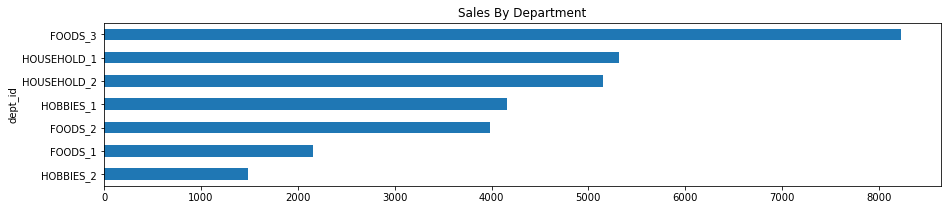

In [12]:
#Sales By Department
sales.groupby('dept_id').count()['id'].sort_values().plot(kind='barh',figsize=(15,3), title='Sales By Department')
plt.show()

In [18]:
sales.groupby('state_id').count()['id']

state_id
CA    12196
TX     9147
WI     9147
Name: id, dtype: int64

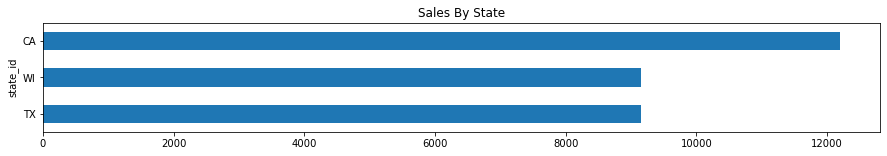

In [14]:
#Sales By State
sales.groupby('state_id').count()['id'].sort_values().plot(kind='barh',figsize=(15,2), title='Sales By State')
plt.show()

In [20]:
sales.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)

In [26]:
date_columns = [c for c in sales.columns if 'd_' in c] # select date columns => d_1 부터 d_1913까지 변수로 지정 (x축 데이터)
gouped_by_cat_totals = sales.groupby(['cat_id']).sum().T  #get sum and trasnpose(열과 행 데이터 바꿔준다)
print(gouped_by_cat_totals)

cat_id    FOODS  HOBBIES  HOUSEHOLD
d_1     23178.0   3764.0     5689.0
d_2     22758.0   3357.0     5634.0
d_3     17174.0   2682.0     3927.0
d_4     18878.0   2669.0     3865.0
d_5     14603.0   1814.0     2729.0
...         ...      ...        ...
d_1909  23632.0   3472.0     8239.0
d_1910  23317.0   3353.0     8363.0
d_1911  26704.0   4085.0     9728.0
d_1912  31927.0   4787.0    12248.0
d_1913  32654.0   4683.0    12458.0

[1913 rows x 3 columns]


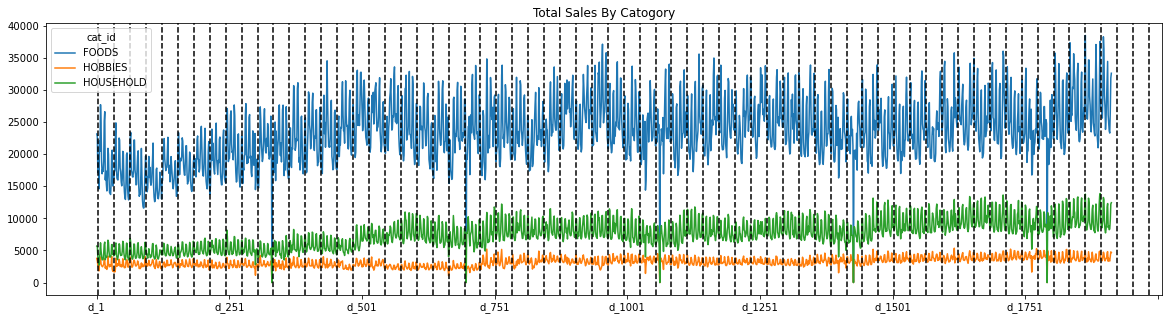

In [46]:

gouped_by_cat_totals.plot(figsize=(20,5),title="Total Sales By Catogory")
cal_columns = ['d','month']
monthPosition = np.arange(3,2000,30) #Roughly
for xc in monthPosition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.show()

> Merge the Calandar data with the sales data



In [49]:
cal_columns = ['date','d','month','year','wday','event_type_1','event_type_2']
calendar_selected = calendar[cal_columns].set_index('d')

# aixs=0(index)은 행을 따라 동작합니다. 각 컬럼의 모든 행에 대해서 작용합니다. ② aixs=1(columns)은 열을 따라 동작

total_sales_OverCalendar = pd.concat([calendar_selected,gouped_by_cat_totals],axis=1,sort=False)   
print(total_sales_OverCalendar['event_type_1'].unique())
print(total_sales_OverCalendar['event_type_2'].unique())
total_sales_OverCalendar.head()

[nan 'Sporting' 'Cultural' 'National' 'Religious']
[nan 'Cultural' 'Religious']


,date,month,year,wday,event_type_1,event_type_2,FOODS,HOBBIES,HOUSEHOLD
d_1,2011-01-29,1,2011,1,NaN,NaN,23178.0,3764.0,5689.0
d_2,2011-01-30,1,2011,2,NaN,NaN,22758.0,3357.0,5634.0
d_3,2011-01-31,1,2011,3,NaN,NaN,17174.0,2682.0,3927.0
d_4,2011-02-01,2,2011,4,NaN,NaN,18878.0,2669.0,3865.0
d_5,2011-02-02,2,2011,5,NaN,NaN,14603.0,1814.0,2729.0


No handles with labels found to put in legend.


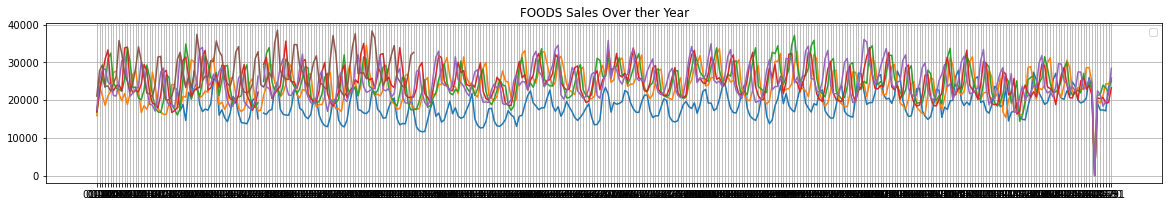

No handles with labels found to put in legend.


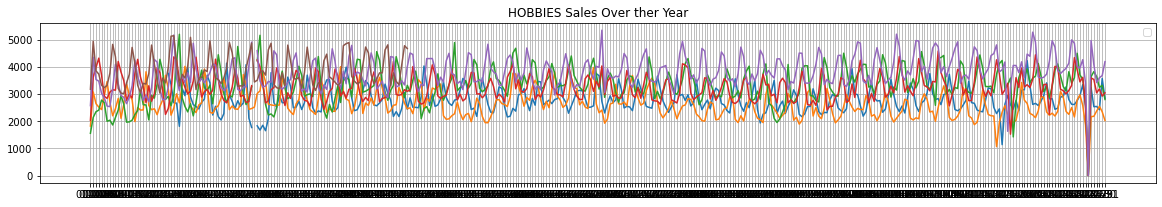

No handles with labels found to put in legend.


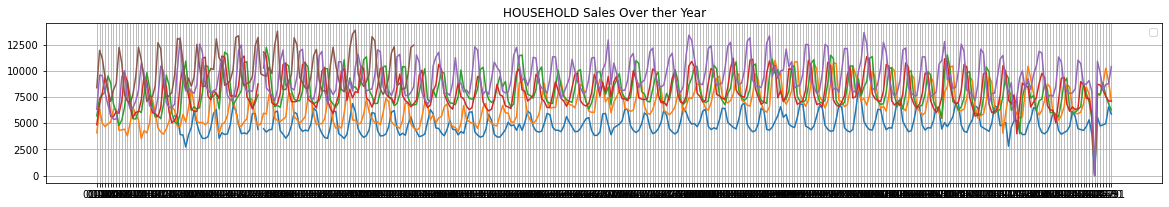

In [52]:
total_sales_OverCalendar['dayOfYear'] = total_sales_OverCalendar['date'].str.slice(5,10) # 01-29 , 01-30 으로 자른다.

def plot_pivoted_year(data,name,num):
    plt.figure(figsize=(20,10))
    plt.subplot(3,1,num)
    plt.title(name+" Sales Over ther Year")
    pivoted = data.pivot_table(index='dayOfYear',columns='year',values=name)
    plt.grid()
    plt.plot(pivoted)
    plt.legend()
    plt.show()
    
plot_pivoted_year(total_sales_OverCalendar,'FOODS',1)
plot_pivoted_year(total_sales_OverCalendar,'HOBBIES',2)
plot_pivoted_year(total_sales_OverCalendar,'HOUSEHOLD',3)

In [58]:
total_sales_OverCalendar.groupby('year')['FOODS','HOBBIES','HOUSEHOLD'].sum().T

year,2011,2012,2013,2014,2015,2016
FOODS,6258864.0,8660268.0,8991482.0,8995525.0,9013855.0,3169945.0
HOBBIES,939151.0,959837.0,1208059.0,1183846.0,1390155.0,443752.0
HOUSEHOLD,1658570.0,2441732.0,2936212.0,2910405.0,3396801.0,1136950.0


In [56]:
gouped_yearly = total_sales_OverCalendar.groupby('year')['FOODS','HOBBIES','HOUSEHOLD'].mean().T 
gouped_yearly

year,2011,2012,2013,2014,2015,2016
FOODS,18572.296736,23661.934426,24634.197260,24645.273973,24695.493151,27564.739130
HOBBIES,2786.798220,2622.505464,3309.750685,3243.413699,3808.643836,3858.713043
HOUSEHOLD,4921.572700,6671.398907,8044.416438,7973.712329,9306.304110,9886.521739


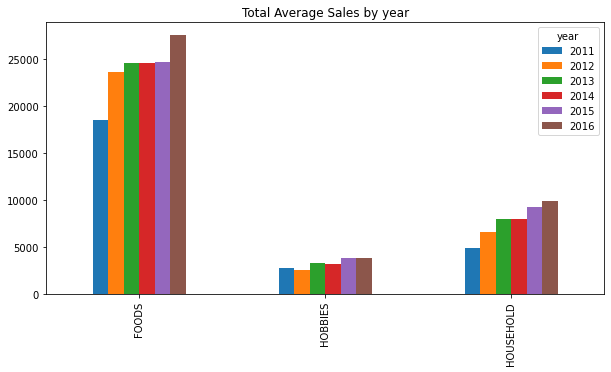

In [57]:
#Yearly growth
gouped_yearly.plot(kind='bar',title='Total Average Sales by year',figsize=(10,5))
plt.show()

> Monthly trend analysis


In [61]:
total_sales_OverCalendar['dayOfMonth'] = total_sales_OverCalendar['date'].str.slice(8,10) # 일수만 출력
total_sales_OverCalendar['dayOfMonth']

d_1       29
d_2       30
d_3       31
d_4       01
d_5       02
          ..
d_1965    15
d_1966    16
d_1967    17
d_1968    18
d_1969    19
Name: dayOfMonth, Length: 1969, dtype: object

No handles with labels found to put in legend.


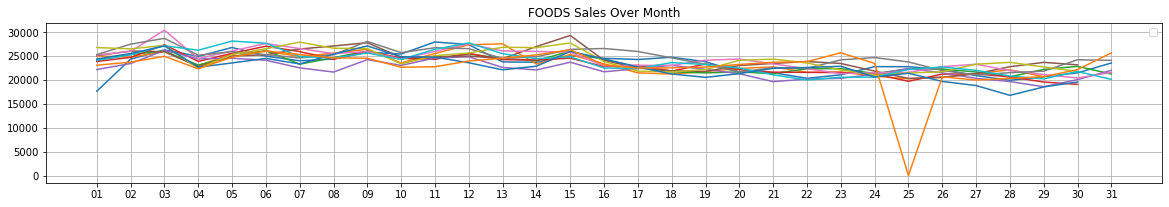

No handles with labels found to put in legend.


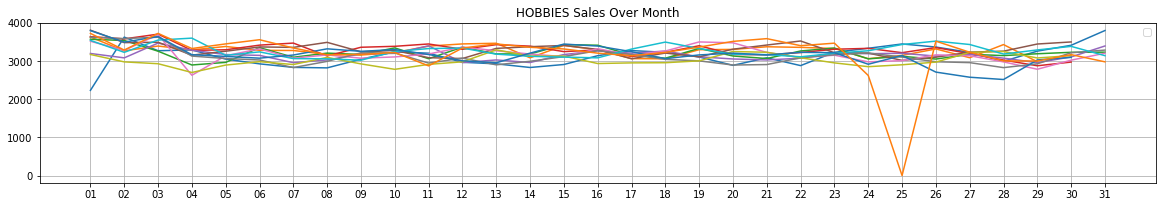

No handles with labels found to put in legend.


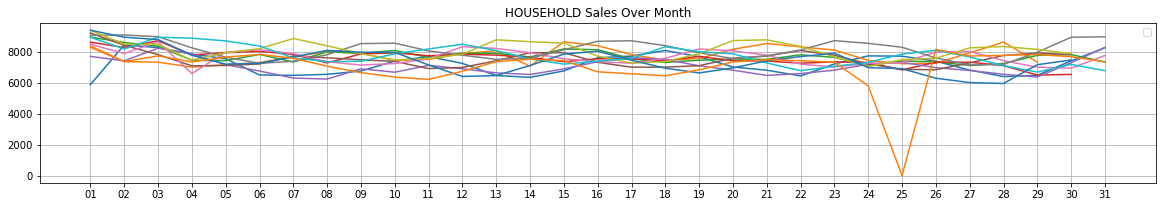

In [62]:
def plot_pivoted_month(data,name,num):
    plt.figure(figsize=(20,10))
    plt.subplot(3,1,num)
    plt.title(name+" Sales Over Month")
    pivoted = data.pivot_table(index='dayOfMonth',columns='month',values=name)
    plt.grid()
    plt.plot(pivoted)
    plt.legend()
    plt.show()
    
plot_pivoted_month(total_sales_OverCalendar,'FOODS',1)
plot_pivoted_month(total_sales_OverCalendar,'HOBBIES',2)
plot_pivoted_month(total_sales_OverCalendar,'HOUSEHOLD',3)

In [64]:
gouped_monthly = total_sales_OverCalendar.groupby('month')['FOODS','HOBBIES','HOUSEHOLD'].mean().T
gouped_monthly

month,1,2,3,4,5,6,7,8,9,10,11,12
FOODS,23504.430380,23599.129412,23406.752688,23356.959770,22307.845161,24177.140000,24295.219355,24704.006452,24378.713333,23680.264516,22736.833333,22772.129032
HOBBIES,3137.917722,3289.094118,3220.096774,3312.620690,3158.051613,3311.213333,3186.858065,3116.361290,3026.580000,3275.290323,3165.953333,3192.258065
HOUSEHOLD,7190.000000,7756.417647,7712.989247,7589.103448,7037.954839,7513.060000,7640.341935,8126.277419,8073.966667,7757.922581,7388.040000,7016.077419


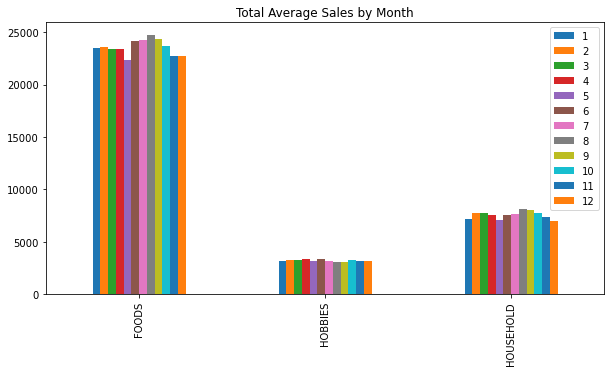

In [65]:
#Monthly growth
gouped_monthly.plot(kind='bar',title='Total Average Sales by Month',figsize=(10,5))
plt.legend(loc='best')
plt.show()

In [66]:
def plotSalesAndEvents(data,eventData,col_name):
    eventData.plot(kind='bar',figsize=(20,5),title='Event count vs Sales('+col_name+')',stacked=True)
    data[col_name].plot(secondary_y=True,figsize=(20,5),linewidth=4)
    plt.grid()
    plt.show()
    
def getEventData(data,eventType):
    eventData = data[data[eventType].notnull()].pivot_table(index='month',columns=eventType,values='wday',aggfunc=len)
    eventData = eventData.fillna(0)
    eventData = eventData.reset_index('month')
    eventData = eventData.set_index('month')
    return eventData
    


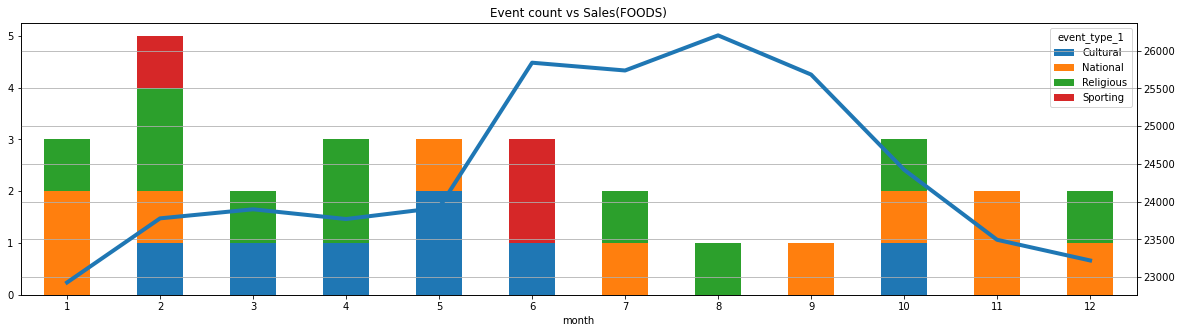

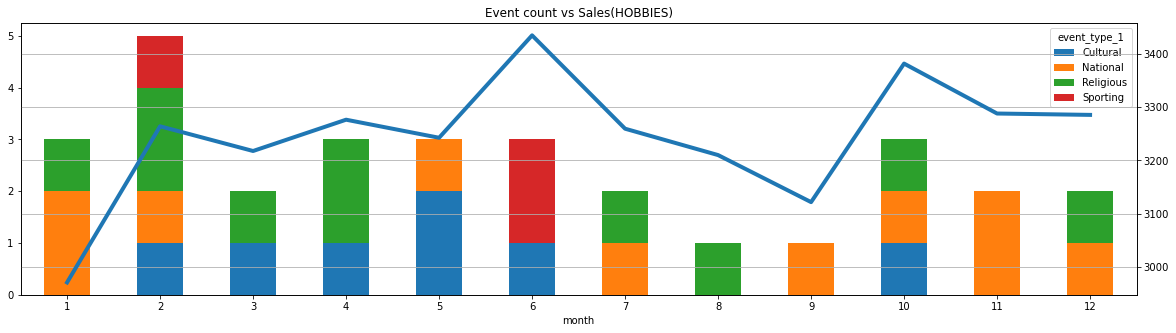

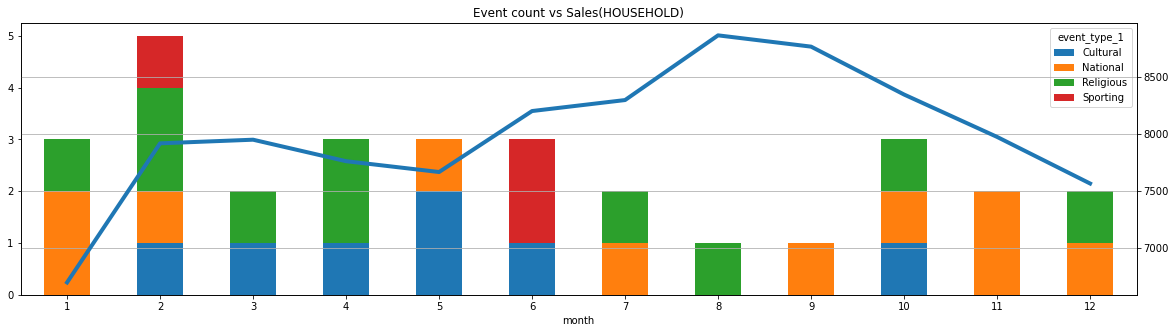

In [67]:
#Chose complete year data. 2011 and 2016 we don't have whole year data.
complete_year_data = total_sales_OverCalendar[ (total_sales_OverCalendar['year']>2011) & (total_sales_OverCalendar['year']<2016)]
gouped_monthly = complete_year_data.groupby('month')['FOODS','HOBBIES','HOUSEHOLD'].mean()
gouped_monthly = gouped_monthly.reset_index('month')
data_2012 = total_sales_OverCalendar[total_sales_OverCalendar['year']==2012]
eventData = getEventData(data_2012,'event_type_1')
plotSalesAndEvents(gouped_monthly,eventData,'FOODS')
plotSalesAndEvents(gouped_monthly,eventData,'HOBBIES')
plotSalesAndEvents(gouped_monthly,eventData,'HOUSEHOLD')

Events can affect sales. 

Above graphs we can see less number of event seasons people tend to buy more FOOD and household items. 

People tend to buy HOBIIES catogry when their are more events.

We can clearly see that month 6 having highest sales on HOBIIES catogory where we have highest number of Sporting events for the same month. 

Month 8 having highes FOOD and HOUSEHOLD sales where lowest events occur for the same month


To get an idea of the modeling, we will try to pridict result using Time series. 

Here, I'm tring to predict total sales for food catogory.

이벤트는 판매에 영향을 줄 수 있습니다. 

위의 그래프에서 이벤트 시즌에 사람들은 더 많은 음식과 가정 용품을 사는 경향이 있습니다. 

사람들은 더 많은 이벤트 시즌들이 있을때 취미용품을 사는 경향이 있습니다.

우리는 같은 월에 가장 많은 수의 스포츠 이벤트가 있는 취미용품에 대한 가장 높은 판매를 갖는 6월달에 분명히 볼 수 있습니다.

8월에 가장 낮은 이벤트가 같은 달에 일어나는 음식과 가정용품 판매가 가장 많다. 


데이터 분석모델링에 대한 아이디어를 얻으려면 시계열 알고리즘을 사용하여 결과를 예측 할 것입니다. 

여기서, 나는 식품의 총 판매를 예측하기 위해 시도 할 것입니다.

> 기간이동 계산 (rolling) 

- rolling 메서드는 현재 열에 대하여 일정 크기의 창(window)를 이용하여 그 window안의 값을 추가 메서드를 통해 계산하는 메서드 입니다.

- 사용법

1. window : 계산할 창(window)의 크기 입니다. 열 기준으로 계산할 경우 행의 수입니다.

2. min_periods : 계산할 최소 크기(기간) 입니다. window 안의 값의 수가 min_periods의 값보다 작을경우 NaN을 출력합니다. 기본적으로 window 크기와 동일합니다.

3. center : {True / False} 레이블을 window의 중간에 둘지 여부입니다. 기본값은 False로 레이블이 창 우측에 위치합니다.

4. win_type : {'triang' / 'gaussian' / ...} 가중치를 넣어 계산할 경우 계산 방식 입니다. 때에따라 연산 메서드에 추가 인수를 지정해야할수도 있습니다.

5. on : 시계열 인덱스나, 시계열과 유사한 열이 있을 경우 이 열을 기준으로 rolling을 수행할 수 있습니다.

6. axis : 계산의 기준이 될 축입니다.

7. closed : {'left' / 'right' / 'both' / 'neither'} window가 닫히는 방향입니다. 자세한건 아래 예시 참고바랍니다

8. method :{'single' / 'table'} numba 를 이용하여 테이블 계산을 진행하여 속도를 높힐지 여부입니다. 현재 'single'만 사용가능합니다.

- 출처:[https://wikidocs.net/152788](https://wikidocs.net/152788)

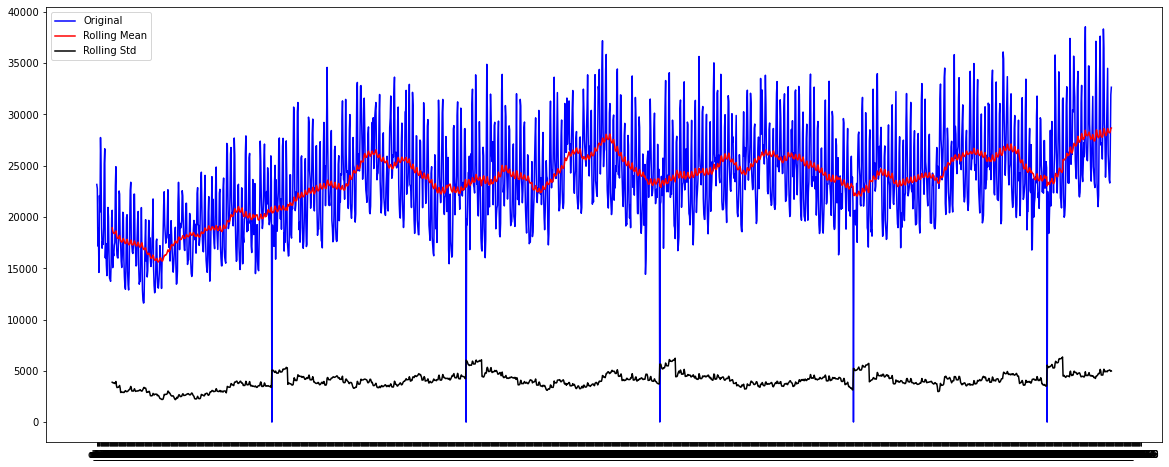

In [69]:
def plot_timeseries_stat(timeseries):
    rollingMean = timeseries.rolling(window=30,center=False).mean() # 한달기준 30일 이므로 window=30으로 설정함
    rollingStd = timeseries.rolling(window=30,center=False).std()
    plt.figure(figsize=(20,8))
    ori = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rollingMean,color='red',label='Rolling Mean')
    std = plt.plot(rollingStd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)

plot_timeseries_stat(total_sales_OverCalendar['FOODS'])


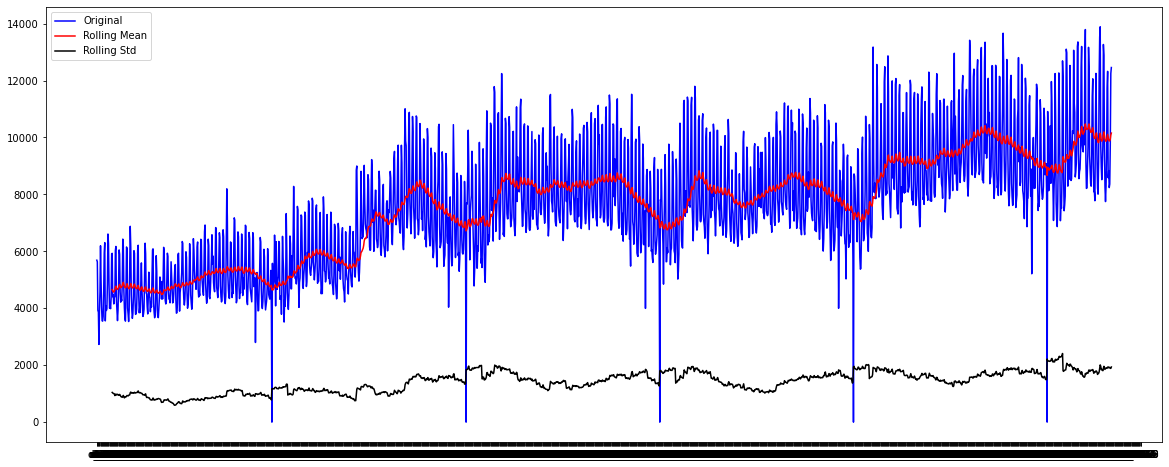

In [78]:
plot_timeseries_stat(total_sales_OverCalendar['HOUSEHOLD'])

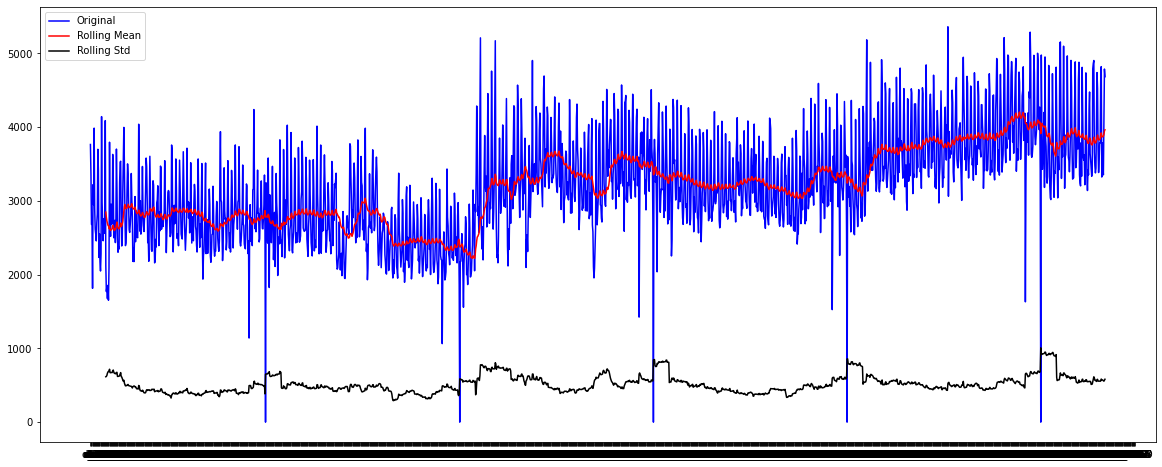

In [79]:

plot_timeseries_stat(total_sales_OverCalendar['HOBBIES'])

### ARIMA 

1. adfuller 라이브러리 - ADF 안정성 테스트 

- 시계열이 안정적(Stationary)인지 여부를 확인하는데 이용되는 방법

- Null hypothesis: 기각에 실패하면 시계열이 안정적이지 않음을 의미한다.(정상 시계열이 아니다)

- Alternative hypothesis: 귀무 가설이 기각되고 시계열이 안정적임을 의미한다. ( 정상 시계열이다)

2. 정상 시계열 (stationary time series) 여부를 확인하는 방법에는  3가지가 있습니다. 

- 시계열 그래프 (time series plot)

- 통계적 가설 검정 (statistical hypothesis test)
  
 ADF 검정  (Augmented Dickey-Fuller test)

 Python의 statsmodels 모듈에 있는 adfuller 메소드를 사용해서 ADF 검정을 위한 사용자 정의함수를 정의
 
 

  

- 자기상관함수(ACF), 편자기상관함수(PACF)



출처: [https://rfriend.tistory.com/694](https://rfriend.tistory.com/694)


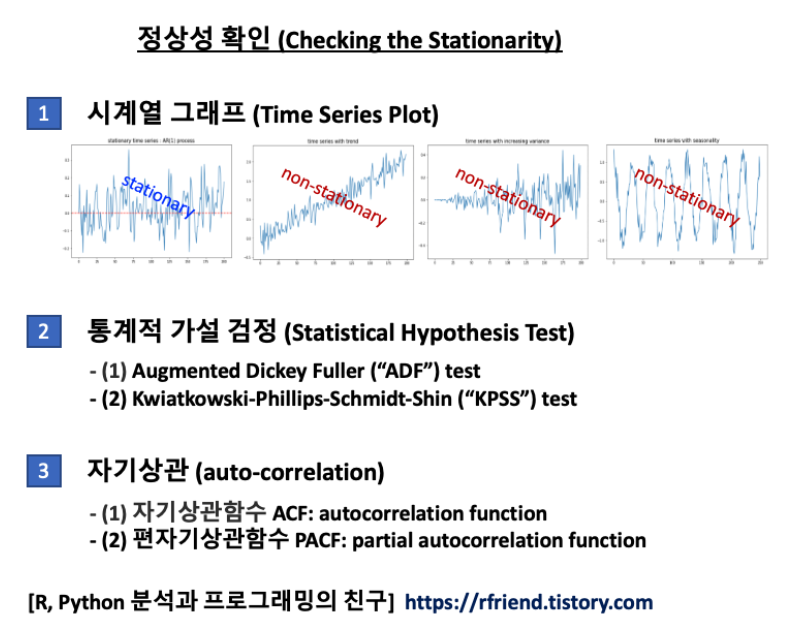

In [81]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Walmart/image/20220315_182030_1.png")

- 사진 출처:[https://rfriend.tistory.com/694](https://rfriend.tistory.com/694)

Test Statistic                 -2.361519
p-value                         0.152893
#Lags Used                     26.000000
No of Observesations Used    1942.000000
Critical Value (1%)            -3.433722
Critical Value (5%)            -2.863029
Critical Value (10%)           -2.567563
dtype: float64


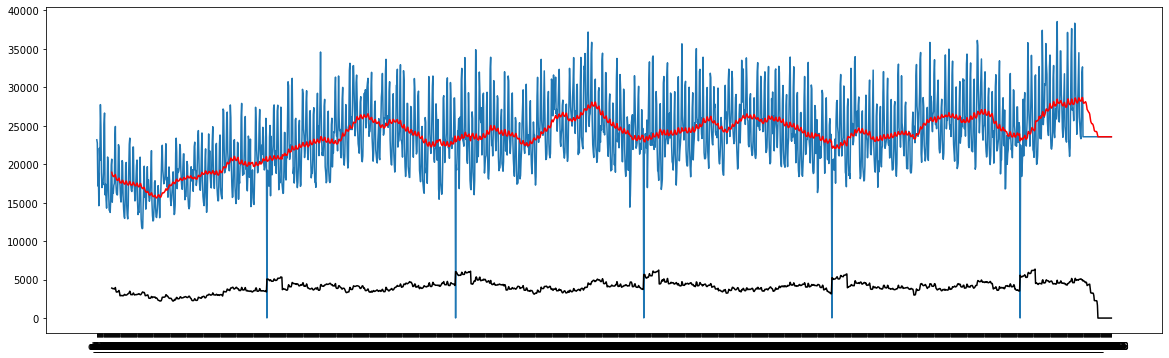

In [80]:
#Making time series stationary
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math


# test_stationarityDF 함수를 사용하여 정상시계열 food_Series에 대해서 ADF검정을 한다.
def test_stationarityDF(timeseries): ##Dickey-Fuller Test
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No of Observesations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

food_Series = total_sales_OverCalendar['FOODS']
food_Series.fillna(food_Series.mean(),inplace=True)
test_stationarityDF(food_Series)

movingAverage = food_Series.rolling(window=30).mean()
movingSTD = food_Series.rolling(window=30).std()
plt.figure(figsize=(20,6))
plt.plot(food_Series)
plt.plot(movingAverage,color='red')
plt.plot(movingSTD,color='black')
plt.show()

- p-value가 0.152893이므로 귀무가설이 성립된다.

- 예를 들어 p-value 가 8.74e-11 이면 유의수준 5% 하에서 귀무가설 (H0: 단위근(unit root)이 존재한다. 즉, 정상 시계열이 아니다)을 기각하고 대립가설 (H1: 단위근이 없다. 즉, 정상 시계열이다.) 을 채택한다.

> We can observe that Test Statistic is not below the 1% of the Critical value. So,Series is not stationary.

> 정상시계열이 아닐때 정상시계열으로 변환하는법

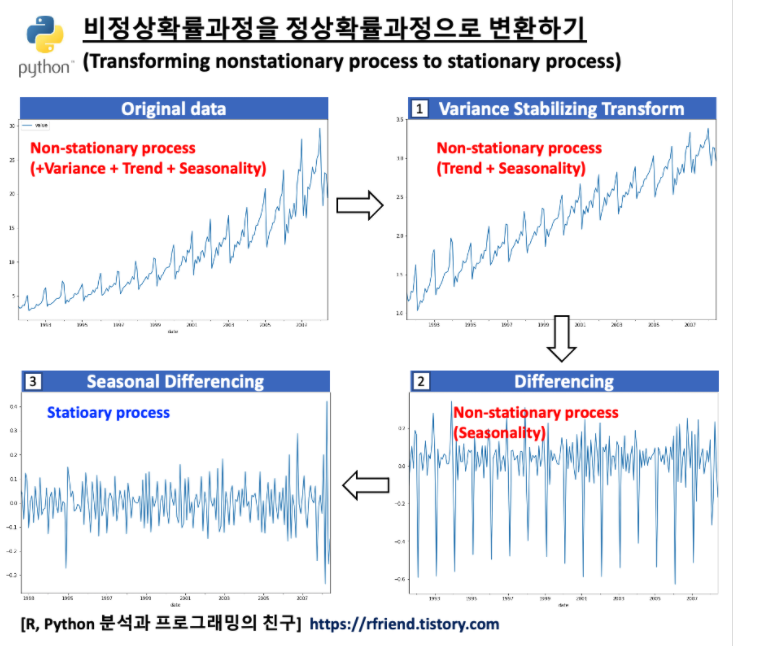

In [83]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Walmart/image/20220315_185619_1.png")

- 출처:[https://rfriend.tistory.com/698](https://rfriend.tistory.com/698)



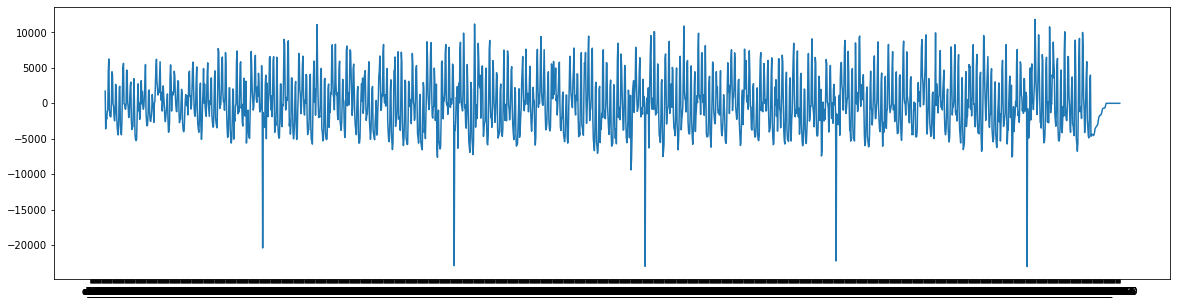

Test Statistic                -8.25633
p-value                        0.00000
#Lags Used                    26.00000
No of Observesations Used   1942.00000
Critical Value (1%)           -3.43372
Critical Value (5%)           -2.86303
Critical Value (10%)          -2.56756
dtype: float64


In [82]:
# Trend가 있기 때문에 차분을 사용한다.
# Make stationarry
foodSeriesDiff = food_Series-movingAverage  
plt.figure(figsize=(20,5))
plt.plot(foodSeriesDiff)
plt.show()
pd.set_option('display.float_format', '{:.5f}'.format)
foodSeriesDiff.fillna(foodSeriesDiff.mean(),inplace=True)
test_stationarityDF(foodSeriesDiff)

> We can observe that Test Statistic is way less than 1% of critical value. So, we can conculde that the above Series is 99% stationary.

- Critical Value(임계치,임계값) : 귀무가설을 기각 또는 채택하는 범위를 구분하는 경계값
 
유의수준 0.05일 때 임계값은 1.96, 유의수준 0.01일 때 임계값은 2.58이다. 따라서 표본통계치가 그 임계값보다 작으면 영가설을 기각하고,  크면 영가설 기각에 실패한다

영가설 : H0

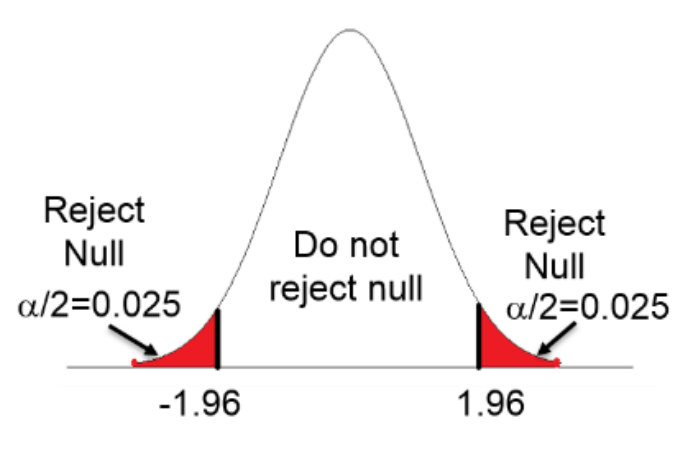

In [84]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Walmart/image/20220315_192207_1.png")

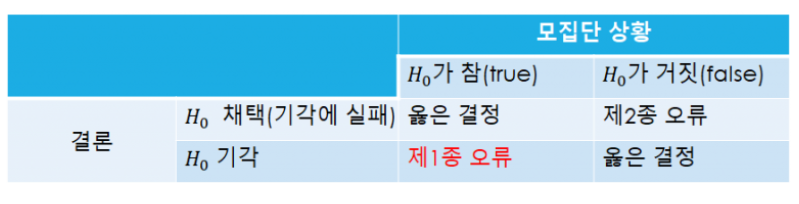

In [85]:

from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Walmart/image/20220315_192501_1.png")

- 사진 출처:[http://piramvill2.org/?p=2935](http://piramvill2.org/?p=2935)

- 영가설이 참임에도 그것을 기각하는 오류를 제1종 오류라고 부르며, 영가설이 거짓임에도 그것을 채택하는 오류를 제2종 오류라고 부른다.


01. 영가설 검증





* 영가설(귀무가설) 과 연구가설(대립가설)



영가설(귀무가설)은 이미 알려져 있는 가설로 '차이가 없다', '관계가 없다'

두집단을 실험했을 때 각 집단에서 동일한 결과가 나올 것이라는 가설이다.



반대로 연구가설(대립가설)은 연구자가 검증하려고 하는 가설이다. 영가설을 부정하는 것으로 설정한다.



예시로 부모의 양육태도와 어린 자녀의 성격 차이가 있다.



HO 영가설: 부모의 양육태도와 어린 자녀의 성격에는 차이가 없을 것이다.

H1 연구가설(대립가설)은 부모의 양육태도와 어린 자녀의 성격에는 차이가 있을 것이다.



* 유의도(p) :  영가설이 발생할 확률



유의도는 p < 0.05 : 영가설이 발생할 확률이 5% 미만이다. 100번 실험해서 5번만 발생할 확률이니 95% 신뢰도 이다.

따라서 통계적으로 유의미하다 라고 표현한다.



유의도가 p < 0.05 , p < 0.01 범위는 영가설이 기각된다. 발생활 확률이 낮기 때문에 연구가설(대립가설)이 성립된다.



대부분의 사회 과학에서는 유의수준을 5%, 1% 로 하지만 1%는 극히 낮은 확률이기에 보통 5% 범위로 기준을 잡는다.



p > 0.05 의 의미는 5% 유의수준에서 두 통계치간의 유의미한 차가 없다. 영가설은 수용한다. 라고 해석된다.



* 가설 검증 결과

가설 검증을 거쳐 영가설은 기각되거나 기각되지 않는다. 영가설이 기각되면 연구가설(대립가설)은 지지된다.



영가설은 기각되고 연구가설은 통계적으로 유의미하다.

영가설은 기각하지 않고 연구가설은 통계적으로 유의미하지 않다.



- 출처: [https://rafier.tistory.com/entry/01-%EC%98%81%EA%B0%80%EC%84%A4-%EA%B2%80%EC%A6%9D](https://rafier.tistory.com/entry/01-%EC%98%81%EA%B0%80%EC%84%A4-%EA%B2%80%EC%A6%9D)

> 자기 상관 함수(ACF)

- K시간 단위로 구분된 시계열의 관측치간 상관의 측도입니다.

- ARIMA 모형을 식별하려면 자기 상관 함수와 편 자기 상관 함수를 함께 사용합니다. 각 시차에서 큰 값을 조사하여 유의한지 확인합니다. 유의한 큰 값이 유의 한계를 벗어나며, 이는 해당 시차에 대한 상관이 0이 아니라는 것을 나타냅니다.



In [87]:
acf(foodSeriesDiff,nlags=30)

array([ 1.        ,  0.51532494,  0.01018562, -0.23284214, -0.26547729,
       -0.07867088,  0.34508284,  0.60395316,  0.28553087, -0.19320325,
       -0.44684459, -0.48521205, -0.27439428,  0.13976862,  0.39197933,
        0.10026008, -0.32830794, -0.54457631, -0.52162816, -0.27929055,
        0.17661088,  0.48258527,  0.23689522, -0.1773894 , -0.36035122,
       -0.32418258, -0.07694777,  0.39847468,  0.69894847,  0.44530487,
        0.03169765])

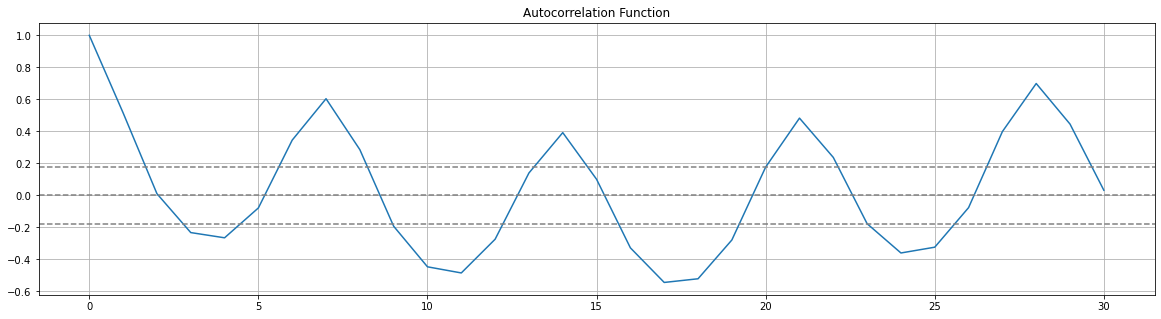

In [86]:
# 자기상관함수 - acf
# statsmodels는 다양한 통계적 모델을 구축할 수 있도록 도와준다.
plt.plot(np.arange(0,31,1),acf(foodSeriesDiff,nlags=30))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(foodSeriesDiff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(foodSeriesDiff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.grid()
plt.show()

> Correlation function cross upper confident value between 1 and 2. Hence chose 2 as p for ARIMA

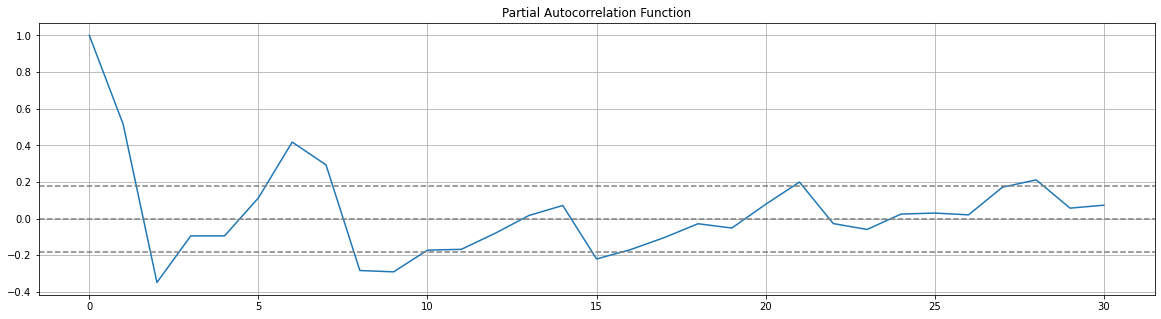

In [88]:
# 부분(편) 자기 상관 함수- pacf
#
plt.plot(np.arange(0,31,1),pacf(foodSeriesDiff,nlags=30))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(foodSeriesDiff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(foodSeriesDiff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.grid()
plt.show()

> Partial Autocorrelation function drop to 0 when value is between 1 and 2. choose 2 as q value

> ACF, PACF 예시 사진으로 이해하기

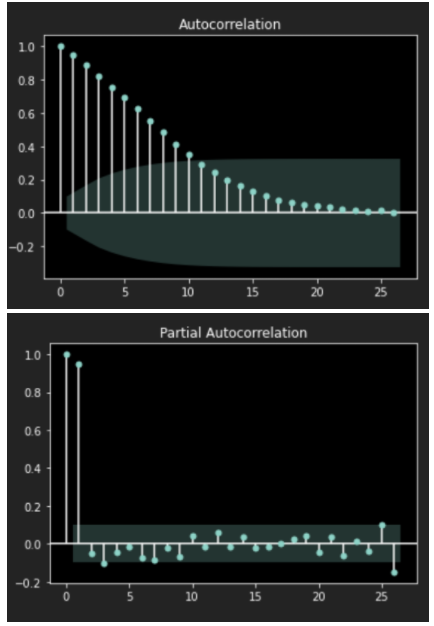

In [90]:

from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Walmart/image/20220315_200710_1.png")

- 위의 예시 그림은 ACF는 서서히 감소하고 PACF는 2에서 마이너스 부호로 바뀌기 때문에 AR(2)가 적절해 보입니다

> ARIMA(data, order=(p,d,q)) 

- (p, d, q)는 AR 순서, 차이 정도 및 MA 순서


- p : 자기회귀 모형(AR)의 시차
- q : 이동평균 모형(MA)의 시차
- d : 차분누적(I) 횟수

- AR(p), MA(q)

- 관측값들 사이에 존재하는 상관관계를 측정하여 ARIMA (p,d,q) 모형을 구성하는 자기회귀(AR) 요소인 p와 이동평균(MA) 요소인 q를 선택하는 단계로, ACF와 PACF의 형태에 따라 모형을 식별하게 된다.



> ARIMA 수학공식 : 논문쓸때 첨부하기 좋은 공식

- 출처:[https://lazyer.tistory.com/28](https://lazyer.tistory.com/28)

A. 자기상관(Autocorrelation) - AR

자기상관성을 시계열 모형으로 구성한 것.

가장 간단한 형태는 바로 직전의 값 1개가 다음 값에 영향을 미치는 AR(1) 모형.

X(t) = { a * X(t-1) + c } + u * e(t)

직전의 값 X(t-1) 에 a를 곱하고 c를 더한다. 여기서 값에 곱해지는 a값을 자기상관계수라고 한다.

분산이 u인 정규 분표에서 도출되는 임의의 값(white noise) e(t)를 더한다.

임의의 이전 시점 P 부터 모델에 넣으면 AR(P) 모형이 된다.

 

B. 이동평균(Moving Average) - MA

시간이 지날수록 어떠한 Variable의 펑균값이 지속적으로 감소하거나 증가하는 경향이 생길 수 있음.

가장 간단한 형태는 직전의 값 1개에서 발생한 오차가 다음 데이터에 영향을 준다고 가정한 MA(1) 모형.

X(t) = { a * e(t-1) + c } + u * e(t)

 

C. ARMA 모형

AR 모형과 MA 모형을 합친 것

ARMA(1, 1) 모형은 다음과 같다.

X(t) = { a * X(t-1)} + {b * e(t-1)} + c + u*e(t)

ARMA(2, 2) 모형은 다음과 같다.

X(t) = { a1 * X(t-1)} + { a2 * X(t-2)} + {b1 * e(t-1)} + {b2 * e(t-2)} + c + u*e(t)

C:\Users\MyCom\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


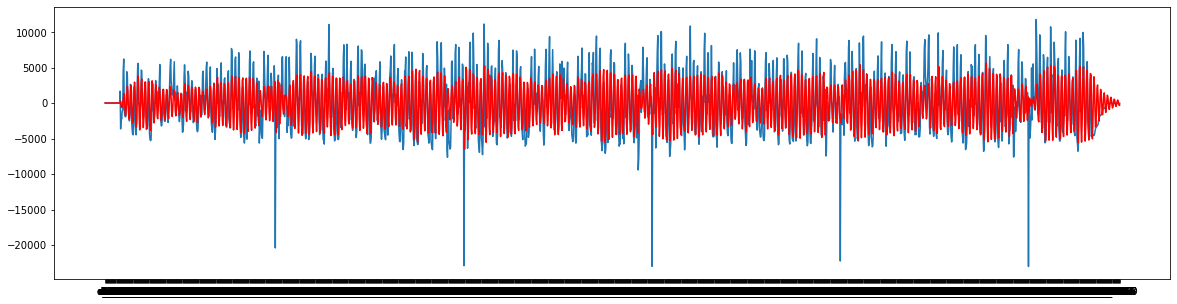

In [99]:
model = ARIMA(foodSeriesDiff,order=(2,0,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(20,5))
plt.plot(foodSeriesDiff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.show()

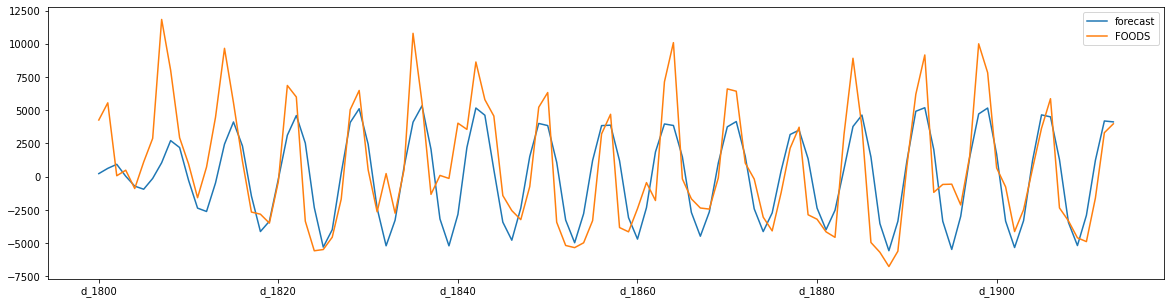

In [110]:
results_ARIMA.plot_predict('d_1800','d_1913',dynamic=False)
plt.show()

> 데이터 맨밑 합계 제거하기